In [5]:
import numpy as np
import pandas as pd

In [6]:
df_final=pd.read_csv('FinalDataset.csv')
df_final.head()

,id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bedrooms,...,amenities_count,host_verifications_count,sentiment,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,44077.0,100.0,1,2,2,1,1,3,2,1.0,...,50,2,0.90417,4.78,4.83,4.74,4.93,4.93,4.66,4.82
1,85156.0,100.0,1,2,2,1,1,3,2,1.0,...,35,2,0.91316,4.79,4.86,4.74,4.90,4.88,4.64,4.78
2,159889.0,100.0,0,3,4,1,1,3,1,1.0,...,27,2,0.82799,4.74,4.77,4.71,4.86,4.90,4.63,4.74
3,162809.0,92.0,1,2,2,1,1,3,6,2.0,...,48,2,0.87307,4.84,4.88,4.85,4.95,4.97,4.77,4.85
4,165828.0,100.0,0,5,5,1,1,4,5,1.0,...,26,2,0.81777,4.63,4.89,4.69,4.81,4.75,4.34,4.55


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
Y=[]
X=df_final
y_features=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
# y_features=['review_scores_value']
for f in y_features:
  Y.append(pd.DataFrame(df_final[f]))
  X=X.drop(f,axis=1)
topFeatures={}
for y in Y:

  # X=X.drop('review_scores_location',axis=1)
  # y = pd.DataFrame(final_df['review_scores_location'])

  # X = final_df.iloc[:,0:19]  #independent columns
  # y = final_df.iloc[:,20]
  fit = bestfeatures.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  labels=(featureScores.nlargest(10,'Score'))  #print 10 best features
  topFeatures[y.columns[0]]=labels['Specs'].array
  print(featureScores.nlargest(10,'Score'))

                     Specs        Score
32               sentiment  6773.682638
1       host_response_rate  6431.843258
30         amenities_count   263.548784
2        host_is_superhost   149.157935
27       reviews_per_month   120.950215
21  number_of_reviews_l30d    78.696163
19       number_of_reviews    74.882495
6   host_identity_verified    72.692301
20   number_of_reviews_ltm    44.521364
22        instant_bookable    42.940935
                     Specs        Score
32               sentiment  5385.757684
1       host_response_rate  3450.414756
30         amenities_count   185.463246
2        host_is_superhost   119.675834
27       reviews_per_month    94.629085
19       number_of_reviews    90.510109
21  number_of_reviews_l30d    57.937598
6   host_identity_verified    53.336071
20   number_of_reviews_ltm    37.393820
22        instant_bookable    34.057676
                     Specs        Score
1       host_response_rate  5711.801576
32               sentiment  4928.552034


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

## MODELS:

- Linear Regression
- Logistic Regression
- SVM
- Baseline
- kNN
- Decision Trees
- Neural nets
- ConvNets

#### Multiple Linear Regression:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [28]:
# for y in Y:
#   features=topFeatures[y.columns[0]]
#   fX=X.copy()
#   fX=fX[[c for c in X.columns if c in features]]
#   # cv = KFold(n_splits=10, random_state=1, shuffle=True)
#   kf = KFold(n_splits=5)
#   print(y.columns[0])
#   kf=KFold(n_splits=5)
#   r2_mean=[]
#   x_train,x_test,y_train,y_test = train_test_split(fX,y,test_size=0.2)
#   for train,test in kf.split(fX):
#     score=[]
#     model = LinearRegression().fit(pd.DataFrame(fX).iloc[train],pd.DataFrame(y).iloc[train])
#     ypred = model.predict(pd.DataFrame(fX).iloc[test])
#     score.append(r2_score(pd.DataFrame(y).iloc[test],ypred))
  
#   print(f'TEST R2: {mean(score)}')
#   # print(f'Accuracy: {accuracy_score(y_test.astype(int),ypred.astype(int))}')
#   # print(f'RMSE: {mean_squared_error(y_test,ypred)}')
#   # print(f'R2: {r2_score(y_test,ypred)}')
#   print('-----------------------')

for y in Y:
  features=topFeatures[y.columns[0]]
  fX=X.copy()
  fX=fX[[c for c in X.columns if c in features]]
  # cv = KFold(n_splits=10, random_state=1, shuffle=True)
  # kf = KFold(n_splits=5)
  print(y.columns[0])

  x_train,x_test,y_train,y_test = train_test_split(fX,y,test_size=0.2)
  model = LinearRegression().fit(x_train, y_train)
  ypred = model.predict(x_test)
  print(f'RMSE: {mean_squared_error(y_test,ypred)}')
  print(f'R2 Score: {r2_score(y_test,ypred)}')
  print('-----------------------')

review_scores_rating
RMSE: 0.1839177278644293
R2 Score: 0.6914630208914432
-----------------------
review_scores_accuracy
RMSE: 0.1657114764929897
R2 Score: 0.5090815493105516
-----------------------
review_scores_cleanliness
RMSE: 0.24874893773324183
R2 Score: 0.5733589866744181
-----------------------
review_scores_checkin
RMSE: 0.11753028755135325
R2 Score: 0.4823847276007879
-----------------------
review_scores_communication
RMSE: 0.10188211299469777
R2 Score: 0.5366560298975582
-----------------------
review_scores_location
RMSE: 0.10739836192949088
R2 Score: 0.3155571845563072
-----------------------
review_scores_value
RMSE: 0.16794396193217762
R2 Score: 0.5805696559747852
-----------------------


#### Logistic Regression: NOT ACCOUNTED FOR

In [9]:
# ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
for y in Y:
  # print(y.shape)
  features=topFeatures[y.columns[0]]
  fX=X.copy()
  fX=fX[[c for c in X.columns if c in features]]
  # cv = KFold(n_splits=10, random_state=1, shuffle=True)

  print(y.columns[0])
  model = LogisticRegression(penalty='none',solver='sag')
  lab = preprocessing.LabelEncoder()
  y_transformed_train = lab.fit_transform(y_train)
  y_transformed_test = lab.fit_transform(y_test)
  model.fit(x_train, y_transformed_train.ravel())
  ypred_LR=model.predict(x_test)
  print('mean %f'%(mean_squared_error(y_transformed_test,ypred_LR)))
  print('-----------------------')



review_scores_rating


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28229.292602
-----------------------
review_scores_accuracy


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28229.292602
-----------------------
review_scores_cleanliness


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28231.708058
-----------------------
review_scores_checkin


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28229.292602
-----------------------
review_scores_communication


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28229.292602
-----------------------
review_scores_location


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


mean 28229.292602
-----------------------
review_scores_value
mean 28229.292602
-----------------------


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Lasso Regression:

In [15]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mtplt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error


review_scores_rating


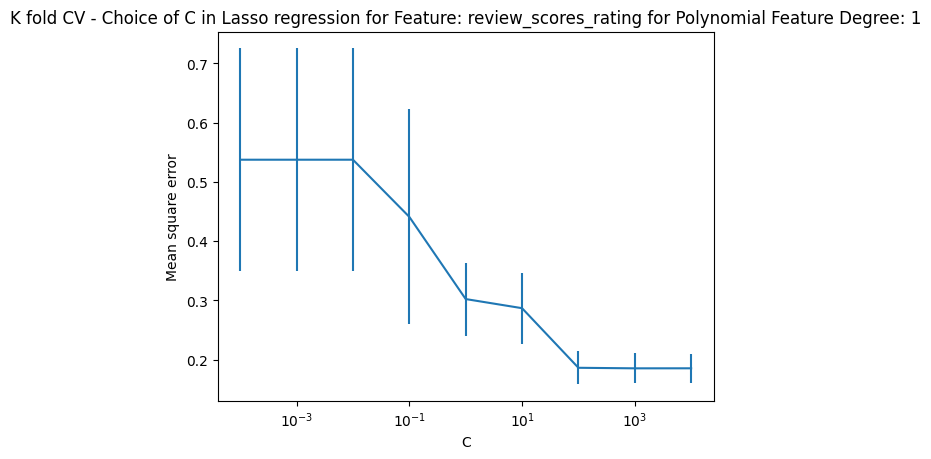

R2 accuracy score: 0.42473881309324624
MAE: 0.24047892132763277
MSE: 0.18144679190182225
RMSE: 0.4259657168151238


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7153485848555192, tolerance: 0.3003861804115148
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4900544512204306, tolerance: 0.3475526286752124
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9726967173767207, tolerance: 0.3571879466883574
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

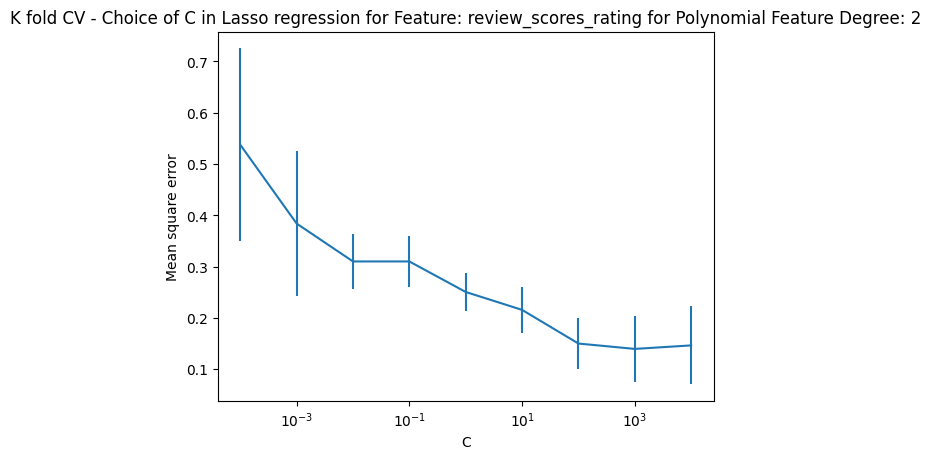

R2 accuracy score: 0.4049342928802667
MAE: 0.2308392785963389
MSE: 0.18769346165738565
RMSE: 0.4332360345785951


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.42984447878644, tolerance: 0.3351013380635064
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.2468685277319, tolerance: 0.2826986705601951
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.190439771924, tolerance: 0.3003861804115148
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

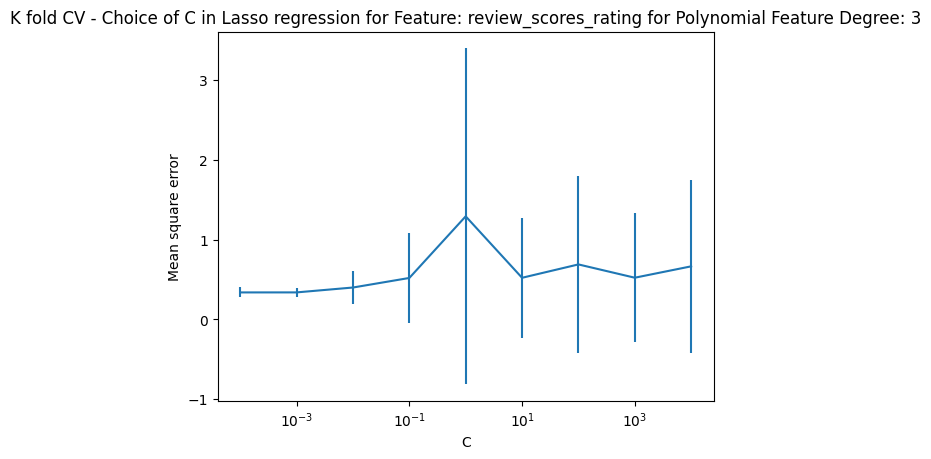

R2 accuracy score: 0.3247933120183579
MAE: 0.2504196933152547
MSE: 0.2129712384450898
RMSE: 0.46148806966712563


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.8828132379083, tolerance: 0.3351013380635064
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874.1147163262723, tolerance: 0.2826986705601951
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885.5738390833568, tolerance: 0.3003861804115148
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

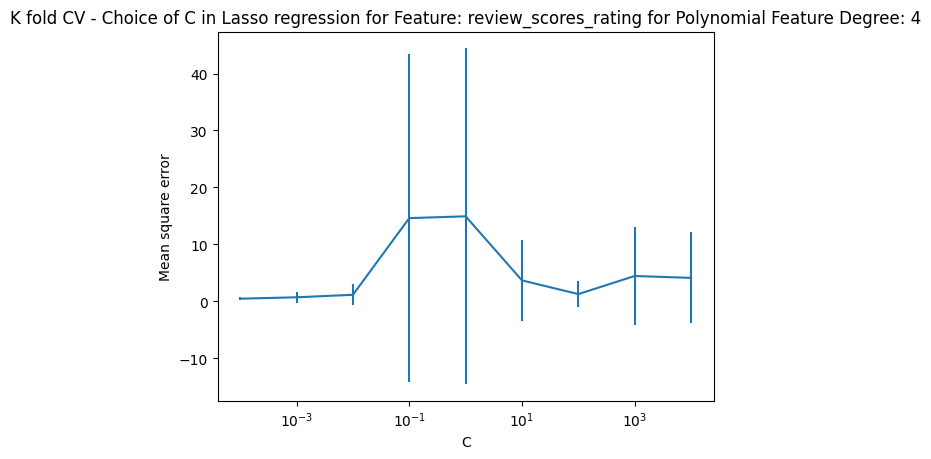

R2 accuracy score: 0.2020306924188856
MAE: 0.2457822319894201
MSE: 0.2516925775494411
RMSE: 0.5016897223876936


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.5002833481008, tolerance: 0.3351013380635064
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693.1277419292976, tolerance: 0.2826986705601951
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657.0863858008087, tolerance: 0.3003861804115148
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

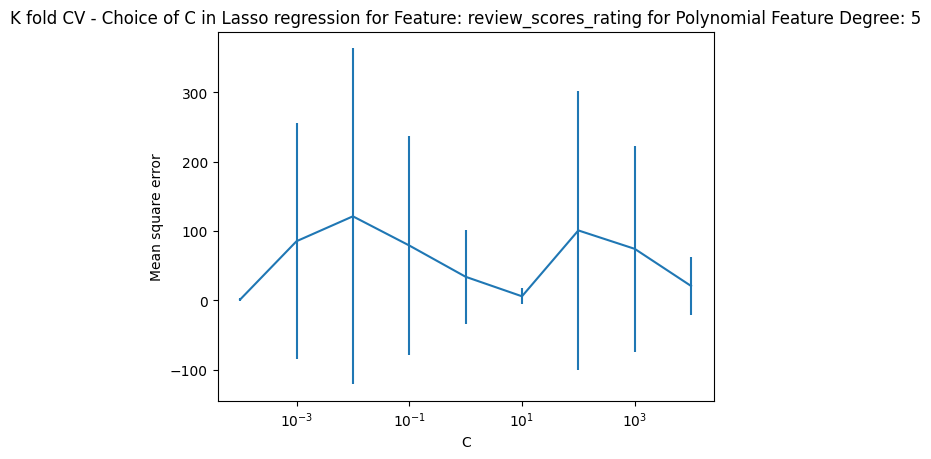

R2 accuracy score: -0.1260887364428689
MAE: 0.26163638306403064
MSE: 0.35518681474586433
RMSE: 0.5959755152234564
-------------------------------------
review_scores_accuracy


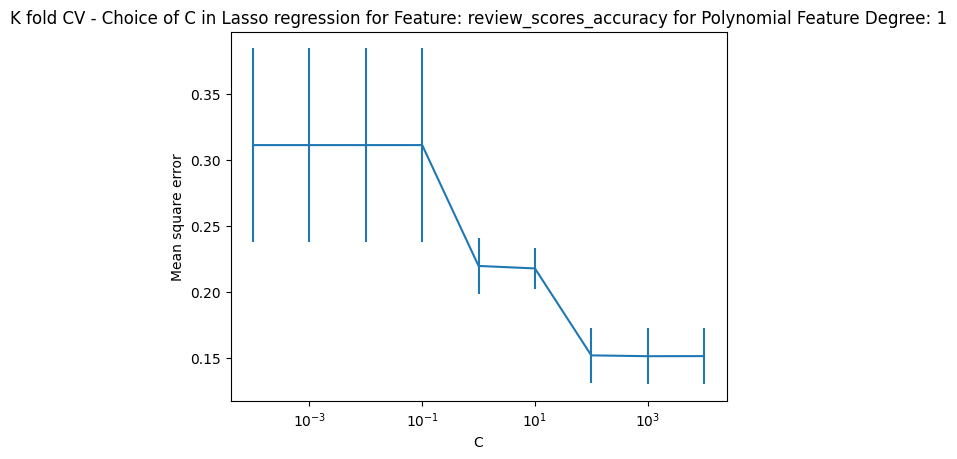

R2 accuracy score: 0.33670408370339433
MAE: 0.20426926564462997
MSE: 0.14668980859480488
RMSE: 0.3830010556053402


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337.1118327851266, tolerance: 0.18790267322619436
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7094564634497829, tolerance: 0.17286983277521384
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.57203263326716, tolerance: 0.17994115046227568
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

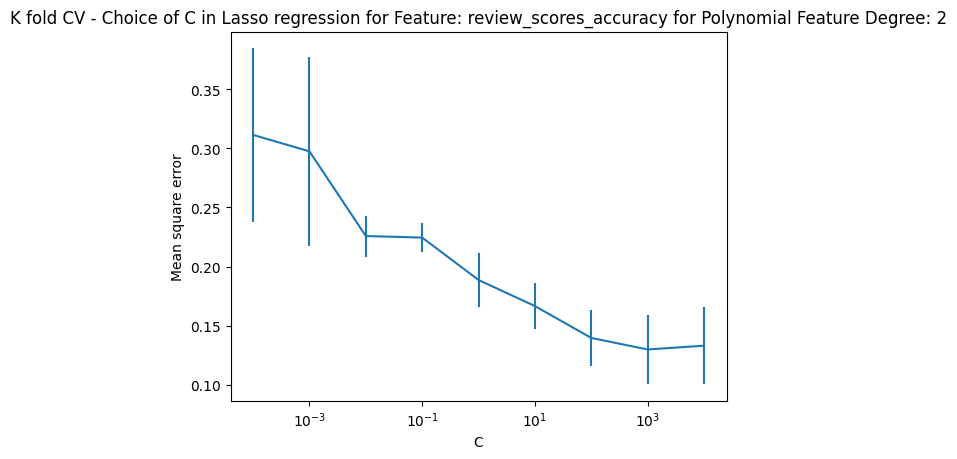

R2 accuracy score: 0.32341687845054534
MAE: 0.22085653459205404
MSE: 0.14962831243210084
RMSE: 0.3868181904100437


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310.2976415164929, tolerance: 0.18790267322619436
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.457377499333234, tolerance: 0.17286983277521384
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367.201255524336, tolerance: 0.17994115046227568
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

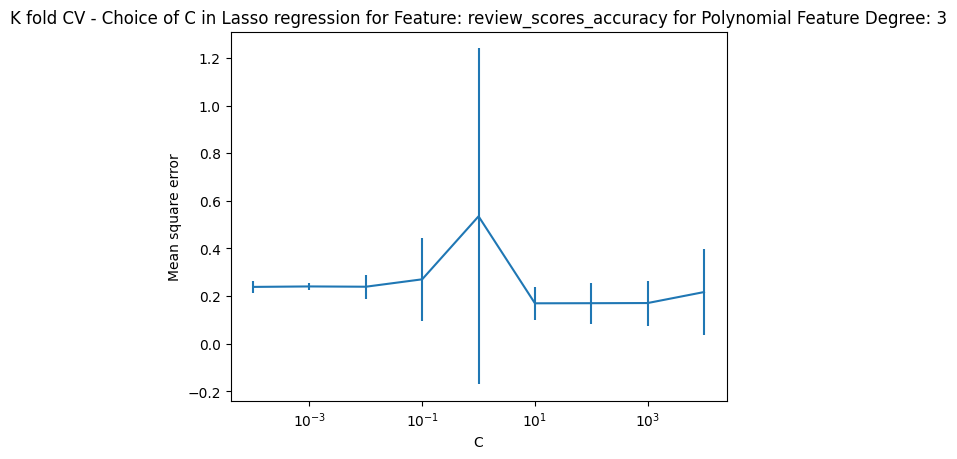

R2 accuracy score: 0.2574452399527932
MAE: 0.23869154002704826
MSE: 0.1642181309220936
RMSE: 0.40523836309275263


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649.3327560147208, tolerance: 0.18790267322619436
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.140104000072, tolerance: 0.17286983277521384
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663.4755777743763, tolerance: 0.17994115046227568
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

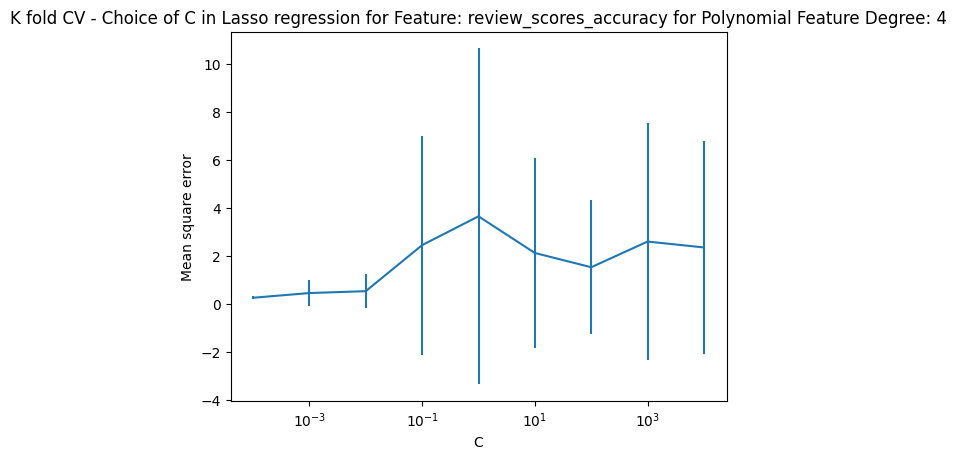

R2 accuracy score: 0.15596720050243196
MAE: 0.23861648159726806
MSE: 0.18666029258451078
RMSE: 0.4320420032641627


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.6885641261837, tolerance: 0.18790267322619436
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.5274197790441, tolerance: 0.17286983277521384
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.0646506594204, tolerance: 0.17994115046227568
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

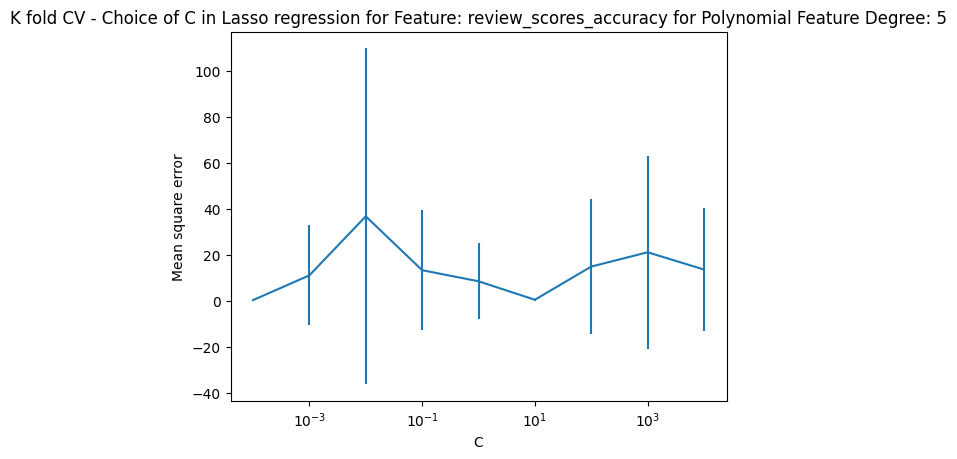

R2 accuracy score: 0.020404889184024166
MAE: 0.24724680078756406
MSE: 0.21664028946281866
RMSE: 0.4654463336012205
-------------------------------------
review_scores_cleanliness


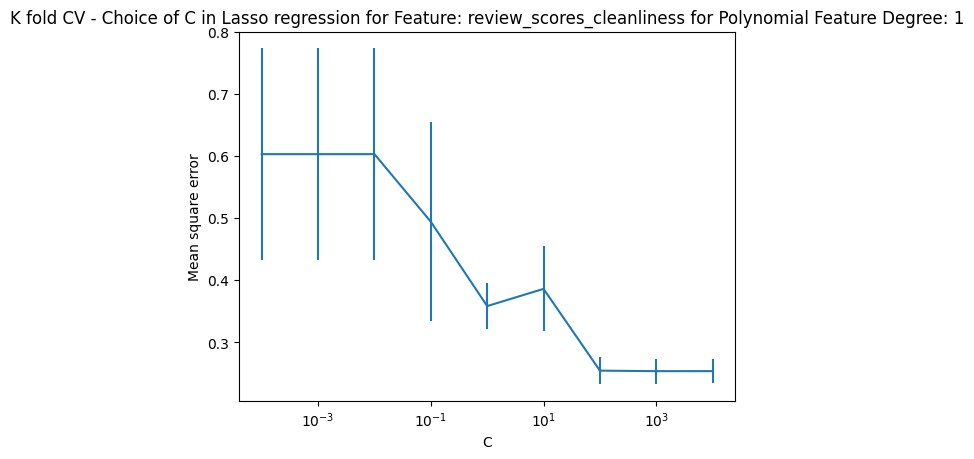

R2 accuracy score: 0.377755404330549
MAE: 0.26774130615961006
MSE: 0.23087774862846214
RMSE: 0.4804973971089356


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.033111905398528, tolerance: 0.36733252343082057
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.48590935289985, tolerance: 0.32684898796686657
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 821.8197613488056, tolerance: 0.34540303022587676
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_des

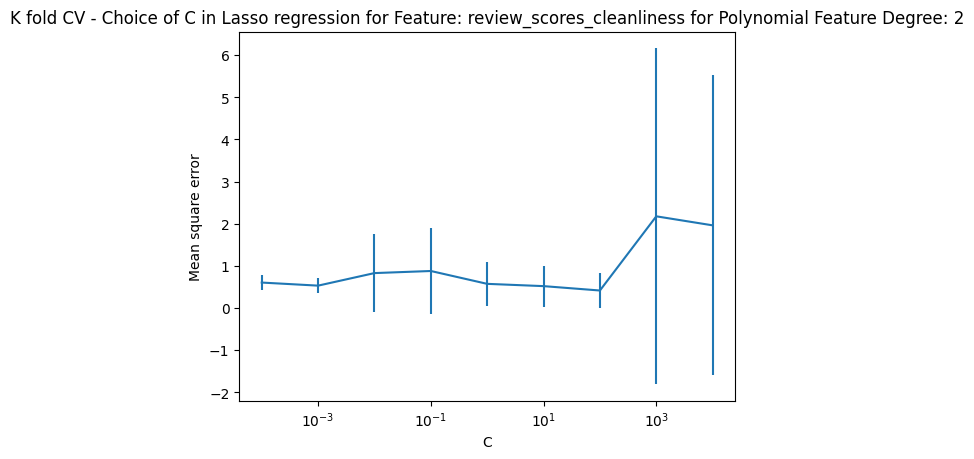

R2 accuracy score: 0.36740937994607437
MAE: 0.27132405878973187
MSE: 0.23471653940907597
RMSE: 0.48447553024799506


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106.6610343807213, tolerance: 0.36733252343082057
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084.2563909381524, tolerance: 0.32684898796686657
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1087.842191721899, tolerance: 0.34540303022587676
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

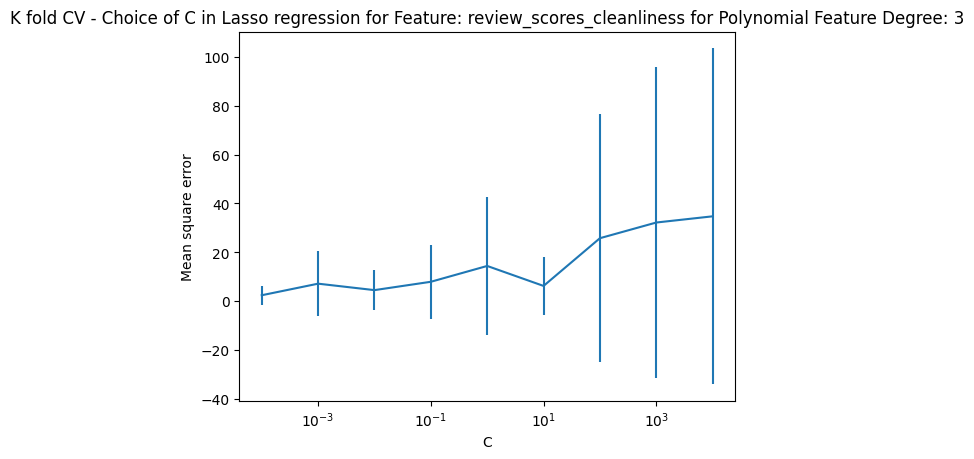

R2 accuracy score: -0.7655971956089922
MAE: 0.32274706694691246
MSE: 0.6551075065077394
RMSE: 0.809387117829126


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093.2327343171917, tolerance: 0.36733252343082057
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.9175788085838, tolerance: 0.32684898796686657
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078.4229492045433, tolerance: 0.34540303022587676
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_d

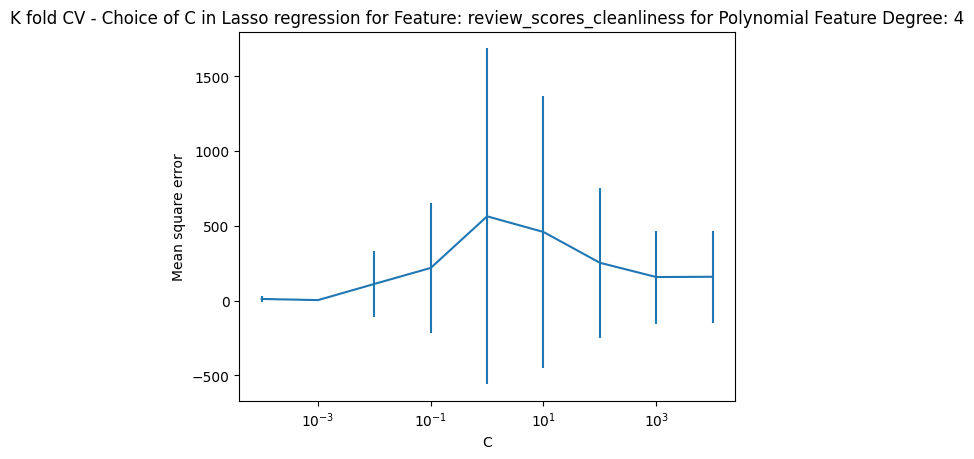

R2 accuracy score: -49.72222912488975
MAE: 0.47199139009155816
MSE: 18.819985175078134
RMSE: 4.338200684048415


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 844.643074698912, tolerance: 0.36733252343082057
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 851.5387353692582, tolerance: 0.32684898796686657
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816.3756775575335, tolerance: 0.34540303022587676
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

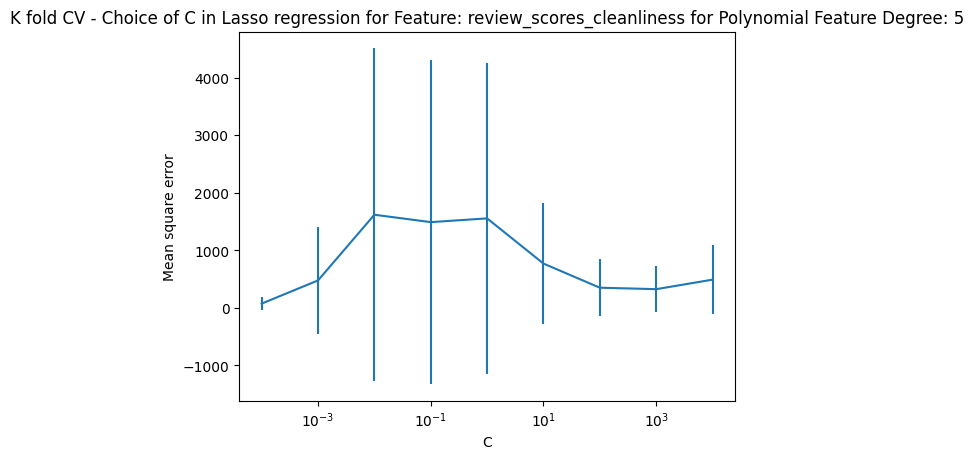

R2 accuracy score: -3513.4537944213544
MAE: 1.4316074961067837
MSE: 1304.0035789170524
RMSE: 36.110989724972264
-------------------------------------
review_scores_checkin


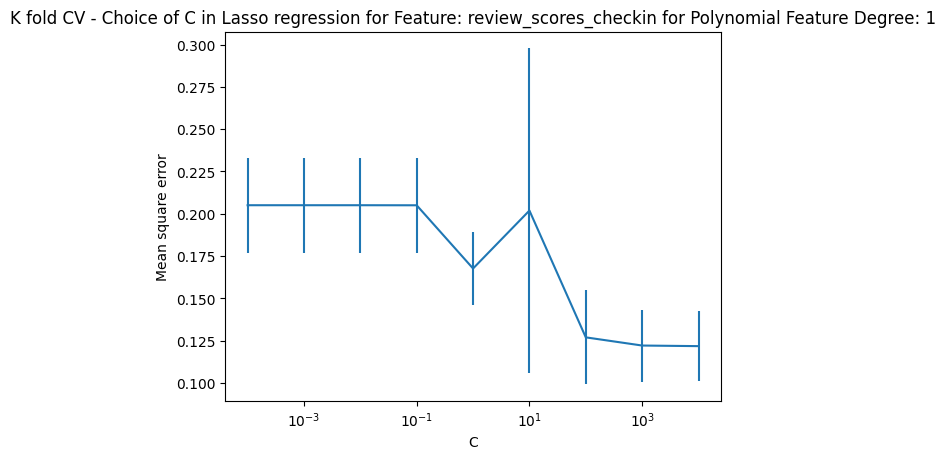

R2 accuracy score: 0.2596477349055838
MAE: 0.17401360729678342
MSE: 0.1260449407725743
RMSE: 0.35502808448427614


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8466225905087867, tolerance: 0.12339823546824953
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8863030314468006, tolerance: 0.12432135038963112
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5565568040457265, tolerance: 0.1166078107202956
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

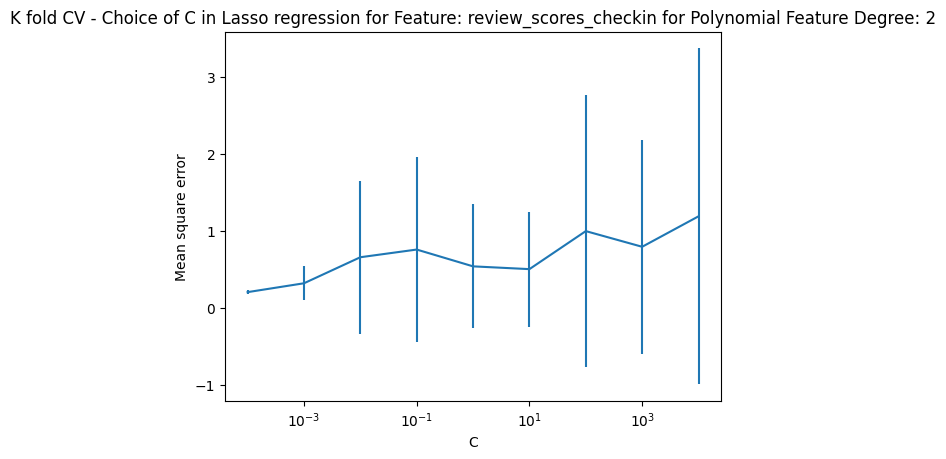

R2 accuracy score: 0.22659008987330564
MAE: 0.19557071945513224
MSE: 0.1316730033944168
RMSE: 0.36286774917925235


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.516814054071, tolerance: 0.12432135038963112
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483.9601307433427, tolerance: 0.1166078107202956
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.1561163784396, tolerance: 0.12339823546824953
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

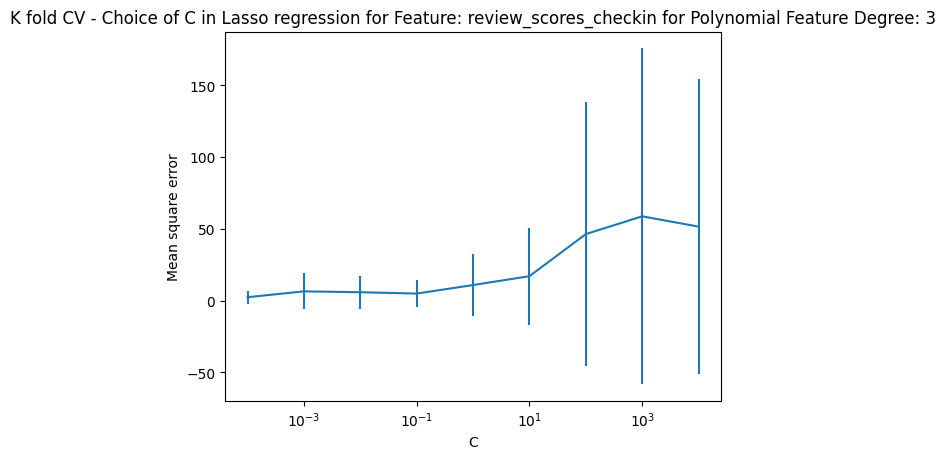

R2 accuracy score: -1.6427973034314958
MAE: 0.2275565593025811
MSE: 0.44993612539628114
RMSE: 0.6707727822417074


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.04355137060986, tolerance: 0.12432135038963112
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.60943974735784, tolerance: 0.1166078107202956
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485.1103927175439, tolerance: 0.12339823546824953
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_des

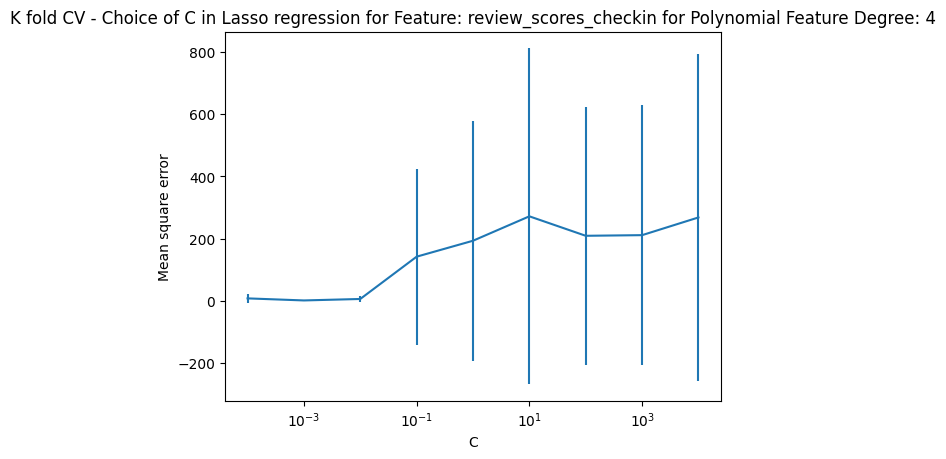

R2 accuracy score: -133.54018863332243
MAE: 0.3777954534582022
MSE: 22.905461234261846
RMSE: 4.7859650264353


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384.9703861304146, tolerance: 0.12432135038963112
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.1482629884176, tolerance: 0.1166078107202956
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.7012364882107, tolerance: 0.12339823546824953
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

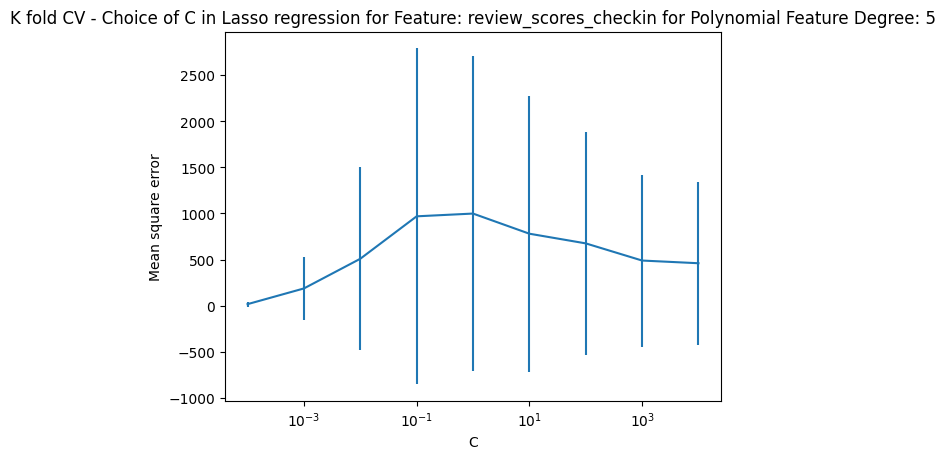

R2 accuracy score: -408.4783501423824
MAE: 0.5573675677256438
MSE: 69.71367121402126
RMSE: 8.34947131344382
-------------------------------------
review_scores_communication


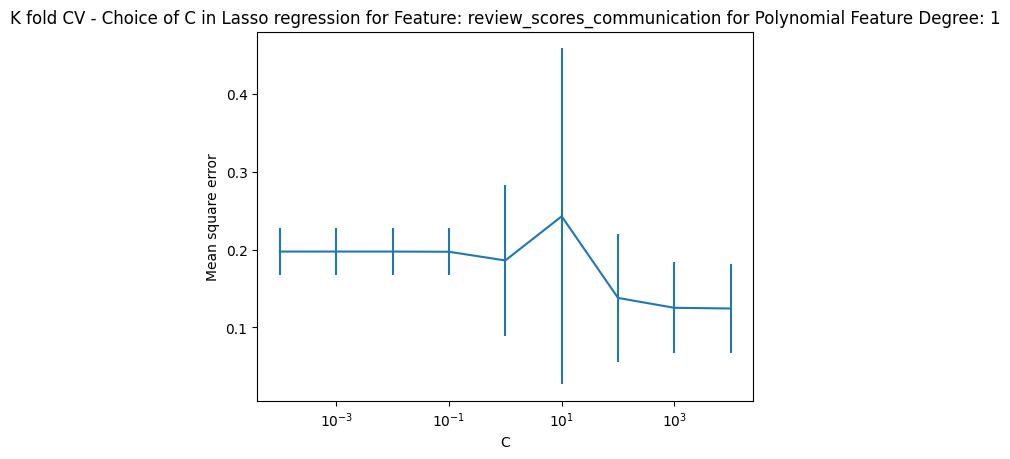

R2 accuracy score: 0.3083700124473463
MAE: 0.16188468377163612
MSE: 0.1190260806835829
RMSE: 0.3450015662045361


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.4428890017146, tolerance: 0.12381747537832083
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.80715429469575, tolerance: 0.11125912268335797
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.720923315624646, tolerance: 0.11812918769519004
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

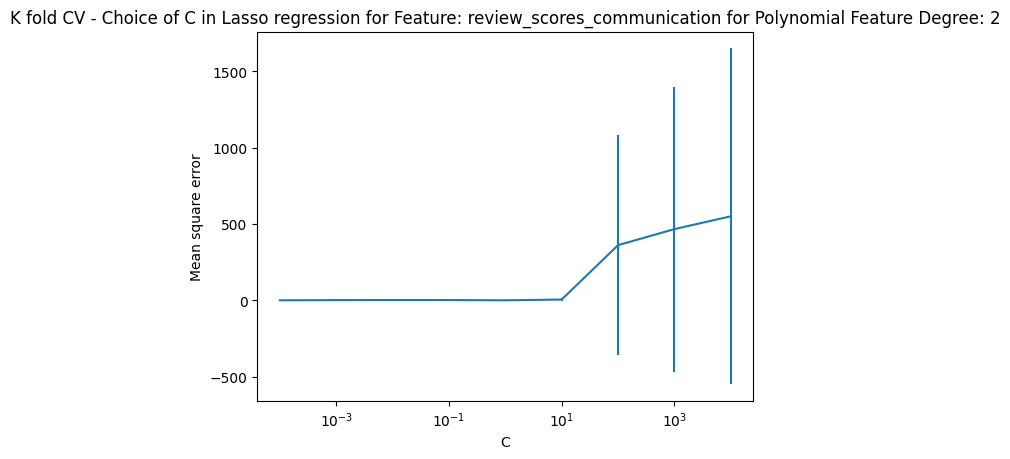

R2 accuracy score: 0.2794114366544842
MAE: 0.17428872861135242
MSE: 0.12400970753729919
RMSE: 0.3521501207401457


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.38007720505635, tolerance: 0.12381747537832083
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450.3248780251293, tolerance: 0.11125912268335797
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.7179770098452, tolerance: 0.11812918769519004
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_des

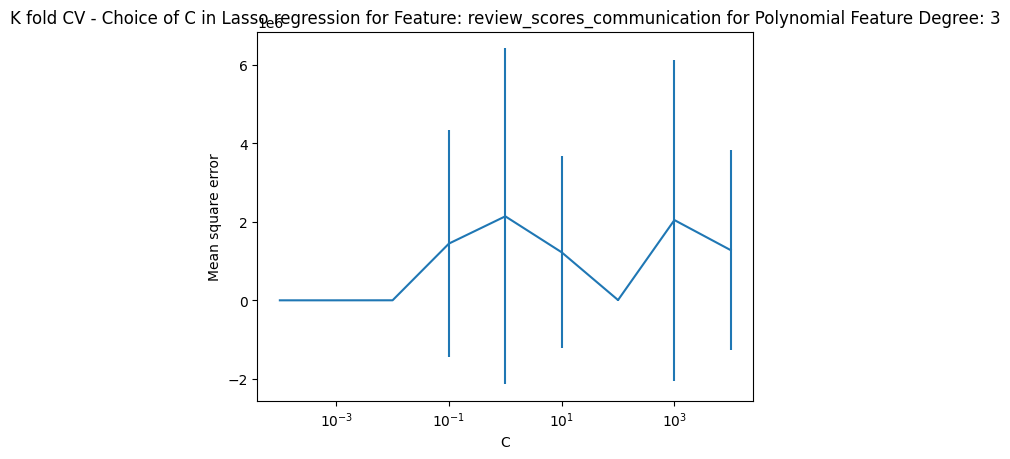

R2 accuracy score: -0.20335790096127693
MAE: 0.1980387875026414
MSE: 0.2070919092416301
RMSE: 0.4550735206992713


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.22410387589963, tolerance: 0.12381747537832083
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.7240114055933, tolerance: 0.11125912268335797
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420.0212677385617, tolerance: 0.11812918769519004
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_des

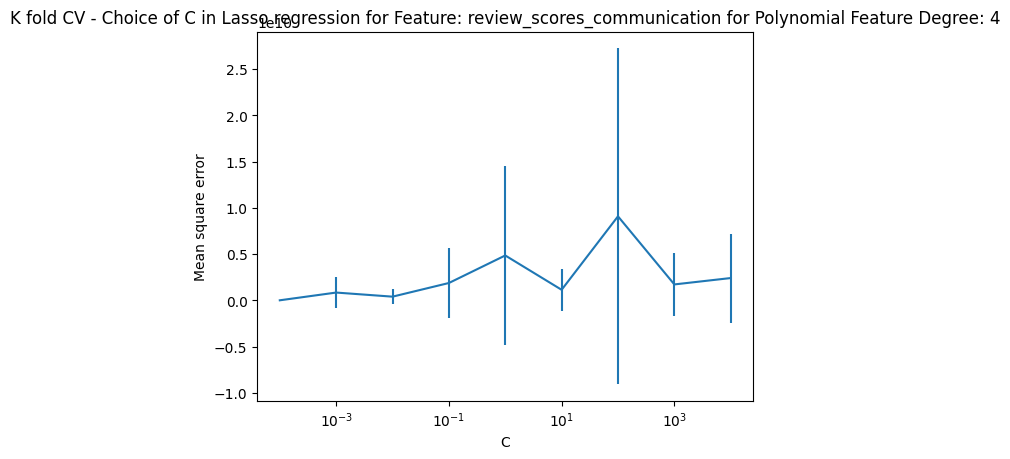

R2 accuracy score: -20.170341232112374
MAE: 0.25486116925614366
MSE: 3.643310424565066
RMSE: 1.9087457726384272


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.300453134979, tolerance: 0.12381747537832083
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342.4038286857956, tolerance: 0.11125912268335797
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.71277199344826, tolerance: 0.11812918769519004
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

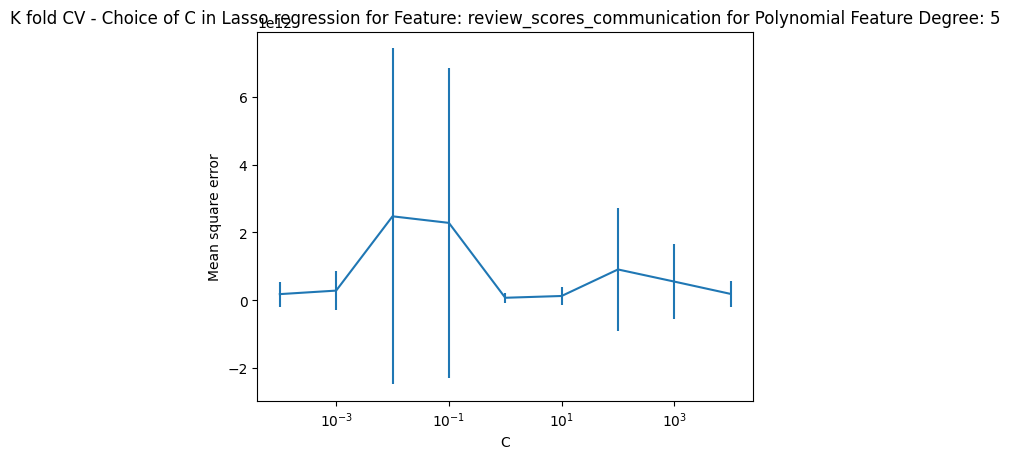

R2 accuracy score: -29.6732883720637
MAE: 0.2844919286294509
MSE: 5.2787203595999594
RMSE: 2.297546595740761
-------------------------------------
review_scores_location


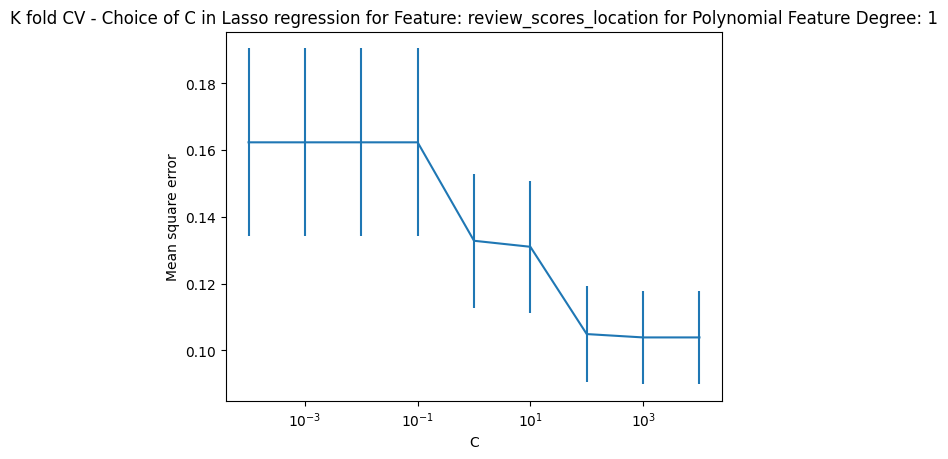

R2 accuracy score: 0.20459487826652578
MAE: 0.20239710095525504
MSE: 0.12742522516527535
RMSE: 0.35696670035911665


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.69030346389383, tolerance: 0.1011326516154014
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.376293484369683, tolerance: 0.09033527064599307
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.3083415963632, tolerance: 0.0976423132494988
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

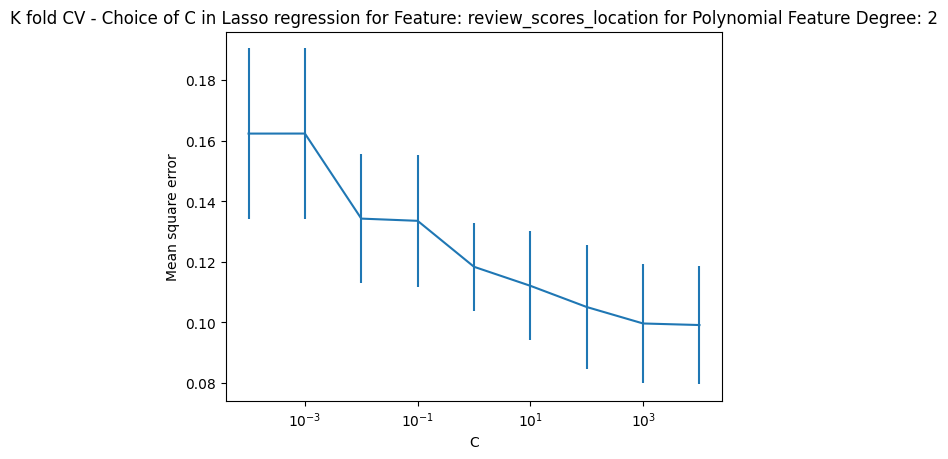

R2 accuracy score: 0.15858327605828637
MAE: 0.21296037716440702
MSE: 0.13479636046651947
RMSE: 0.36714623852971645


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.37900707890145, tolerance: 0.1011326516154014
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234.9369313857827, tolerance: 0.09033527064599307
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.3672904946424, tolerance: 0.0976423132494988
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

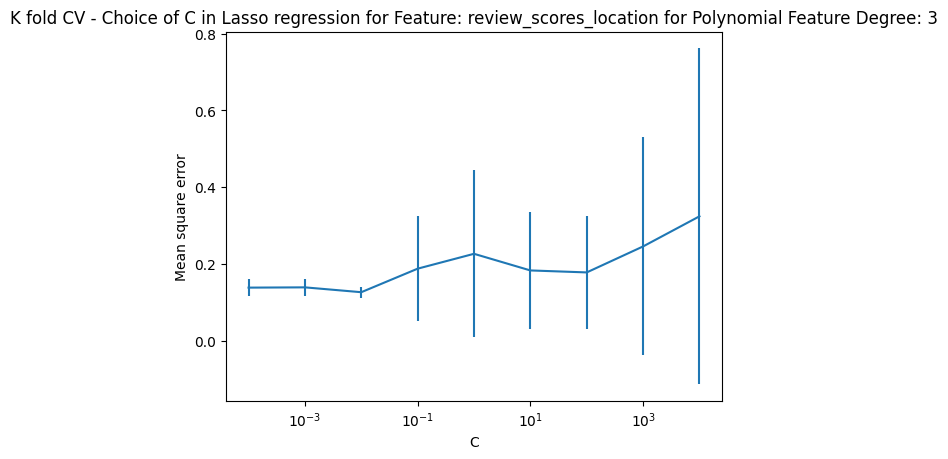

R2 accuracy score: 0.14960420128057117
MAE: 0.22152634418253195
MSE: 0.1362348231996141
RMSE: 0.3691000178808098


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.0403561830546, tolerance: 0.1011326516154014
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.4304135918558, tolerance: 0.09033527064599307
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.1386030792144, tolerance: 0.0976423132494988
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

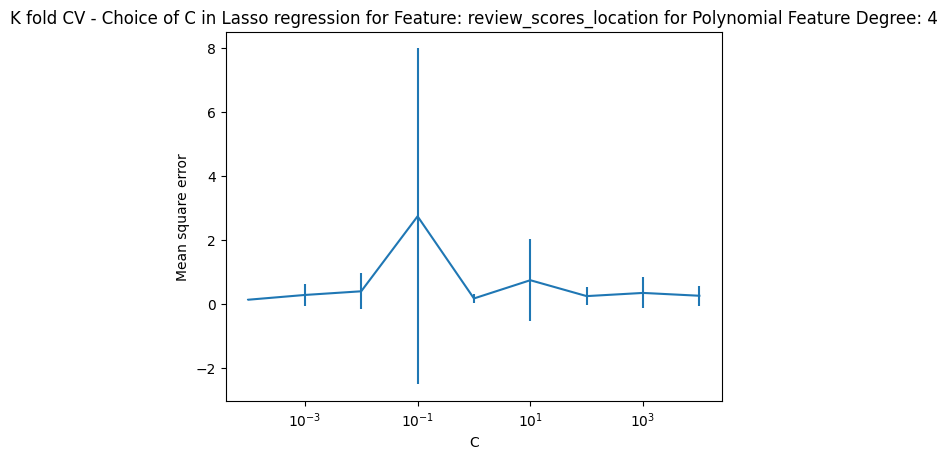

R2 accuracy score: 0.09997904488059484
MAE: 0.2176044831891006
MSE: 0.14418485590036892
RMSE: 0.37971681013667136


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349.1174656523183, tolerance: 0.1011326516154014
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331.6654895763265, tolerance: 0.09033527064599307
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.75436407631497, tolerance: 0.0976423132494988
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

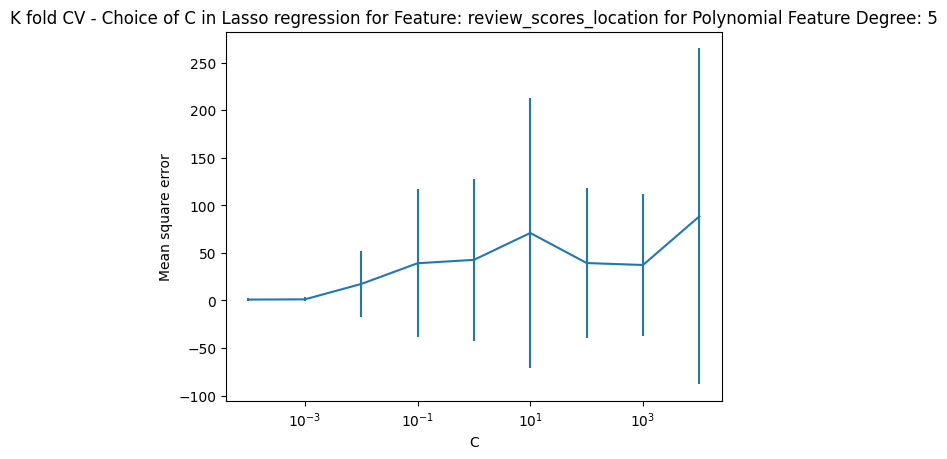

R2 accuracy score: 0.08745118741692226
MAE: 0.22175743295919034
MSE: 0.14619183952987824
RMSE: 0.3823504145804974
-------------------------------------
review_scores_value


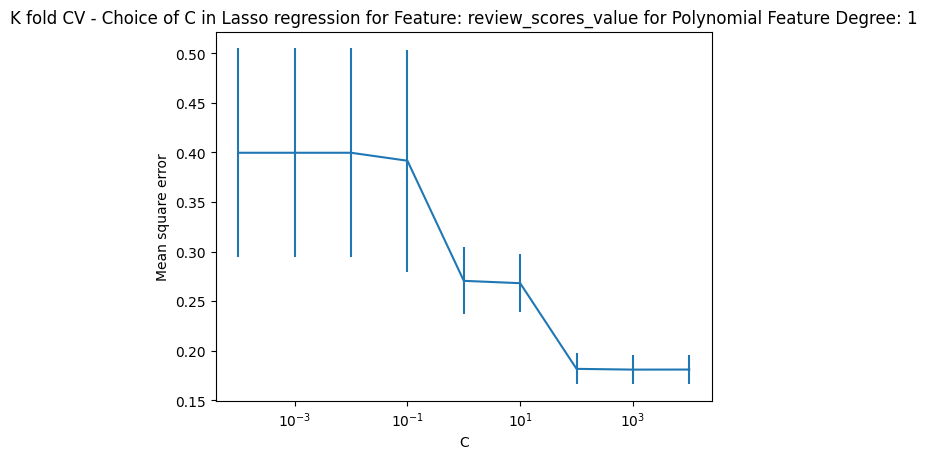

R2 accuracy score: 0.35238261244740254
MAE: 0.25250588540407704
MSE: 0.18255842209326215
RMSE: 0.4272685596826218


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27381044205571925, tolerance: 0.25510550695839435
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7853238523437085, tolerance: 0.2594717592551982
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498.18749206606776, tolerance: 0.2479088684195076
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

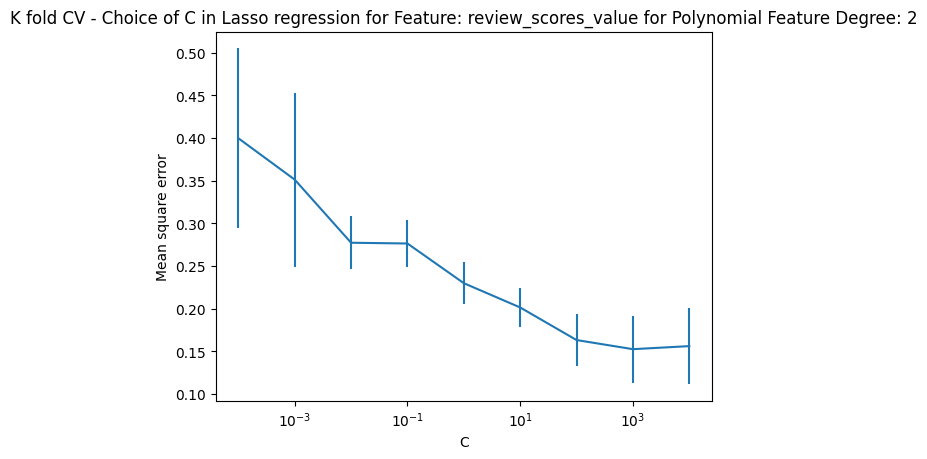

R2 accuracy score: 0.306196176070217
MAE: 0.2800346804447757
MSE: 0.1955780276646846
RMSE: 0.4422420464685426


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378.1132743546537, tolerance: 0.2479088684195076
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.549194380823565, tolerance: 0.21851723945622253
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502.1355337296021, tolerance: 0.22767766532356346
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

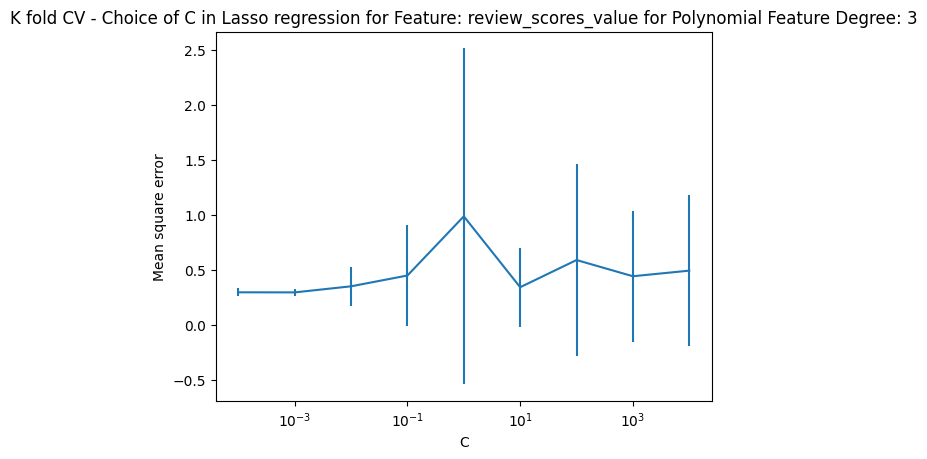

R2 accuracy score: 0.2223543502828702
MAE: 0.29613302393139584
MSE: 0.21921240147141488
RMSE: 0.4682012403565532


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843.039080841038, tolerance: 0.2479088684195076
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.6428255699464, tolerance: 0.21851723945622253
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787.3584714625201, tolerance: 0.22767766532356346
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

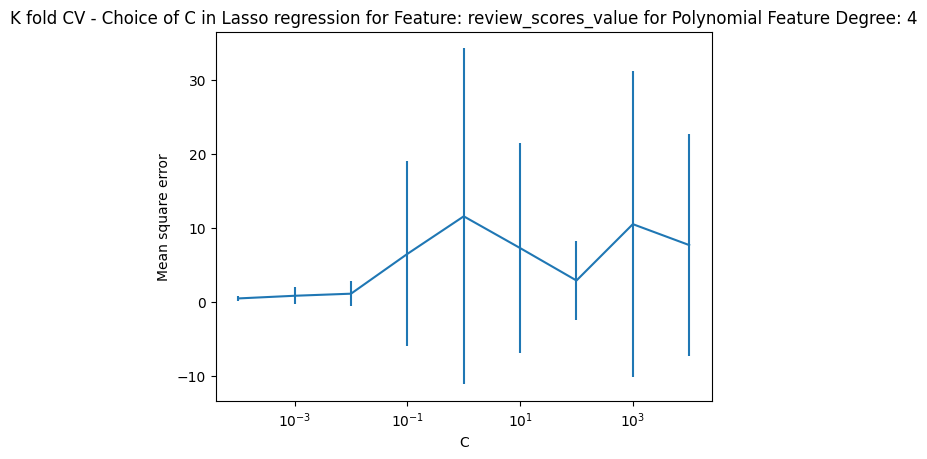

R2 accuracy score: 0.0742434273627165
MAE: 0.3011288508379572
MSE: 0.2609637455563265
RMSE: 0.5108461075082461


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658.8886076976373, tolerance: 0.2479088684195076
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647.2575108653795, tolerance: 0.21851723945622253
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613.0403974104635, tolerance: 0.22767766532356346
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

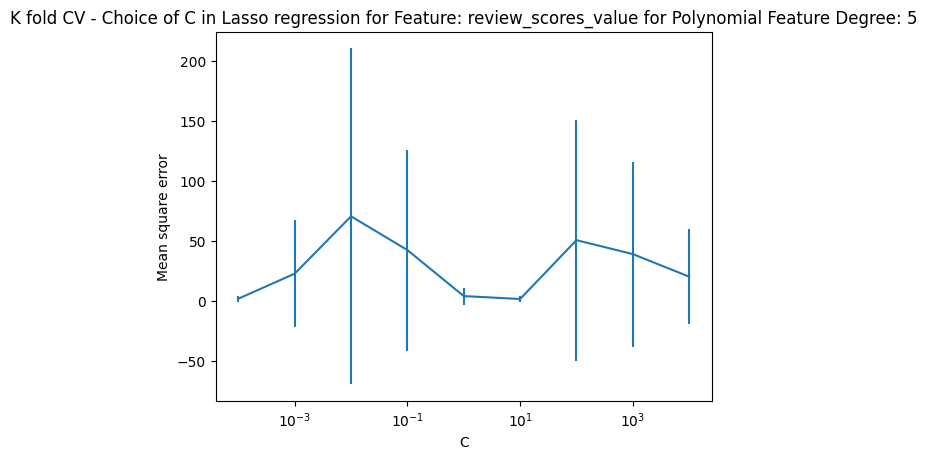

R2 accuracy score: -0.19039942906416796
MAE: 0.3164469792934073
MSE: 0.3355645564921229
RMSE: 0.5792793423661187
-------------------------------------


In [31]:
def kfcv(x,y,c_range,name_of_model,range_of_poly):
  for poly_degree in range_of_poly:
    mean_error=[];std_error=[];
    x_poly=PolynomialFeatures(poly_degree).fit_transform(x)
    # x_poly_test =PolynomialFeatures(poly_degree).fit_transform(x_test)
    for c in c_range:
      if(name_of_model=='Lasso'):
        model=Lasso(alpha=1/(2*c))
      elif(name_of_model=='Ridge'):
        model=Ridge(alpha=1/(2*c))
      
      mean_square_error_temp=[]
      kf=KFold(n_splits=5)
      for train,test in kf.split(x):
        model.fit(pd.DataFrame(x_poly).iloc[train],pd.DataFrame(y).iloc[train])
        predictions=model.predict(pd.DataFrame(x_poly).iloc[test])
        mean_square_error_temp.append(mean_squared_error(pd.DataFrame(y).iloc[test],predictions))
      mean_error.append(np.array(mean_square_error_temp).mean())
      std_error.append(np.array(mean_square_error_temp).std())
    plt.errorbar(c_range,mean_error,yerr=std_error)
    plt.xlabel('C'); plt.ylabel('Mean square error')
    plt.title(f'K fold CV - Choice of C in {name_of_model} regression for Feature: {y.columns[0]} for Polynomial Feature Degree: {poly_degree}')
    plt.xscale('log')
    plt.show()
    # print('R2 score:',r2_score(pd.DataFrame(y).iloc[test],predictions))
    # print('MAE:',mean_absolute_error(pd.DataFrame(y).iloc[test],predictions))
    # print('MSE:',mean_squared_error(pd.DataFrame(y).iloc[test],predictions))
    # print('RMSE:',mean_squared_error(pd.DataFrame(y).iloc[test],predictions,squared=False))

c_vals=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
range_of_poly = [1,2,3,4,5] 
model='Lasso'
    
for y in Y:
  # print(y.shape)
  features=topFeatures[y.columns[0]]
  fX=X.copy()
  fX=fX[[c for c in X.columns if c in features]]
  # poly_feature=5
  print(y.columns[0])
  kfcv(fX,y,c_vals,model,range_of_poly)
  print('-------------------------------------')
  # print('----------------------------------------------------')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
# mean_error=[];std_error=[];
for y in Y:
  # print(y.columns[0])
  label_value=y.columns[0]
  c=0
  poly_degree=0
  if(label_value=='review_scores_rating'):
    poly_degree=4
    c=0.0001
  elif(label_value=='review_scores_accuracy'):
    poly_degree=5
    c=0.0001
  elif(label_value=='review_scores_cleanliness'):
    poly_degree=3
    c=0.001
  elif(label_value=='review_scores_checkin'):
    poly_degree=4
    c=0.001
  elif(label_value=='review_scores_communication'):
    poly_degree=5
    c=0.0001
  elif(label_value=='review_scores_location'):
    poly_degree=5
    c=0.001
  elif(label_value=='review_scores_value'):
    poly_degree=5
    c=0.001
  
  Lasso_x_poly = PolynomialFeatures(poly_degree).fit_transform(fX)
  # mean_square_error_temp=[]
  kf=KFold(n_splits=5)
  for train,test in kf.split(fX):
    model=Lasso(alpha=1/(2*c))
    model.fit(pd.DataFrame(Lasso_x_poly).iloc[train],pd.DataFrame(y).iloc[train])
    predictions=model.predict(pd.DataFrame(Lasso_x_poly).iloc[test])
    # mean_square_error_temp.append(mean_squared_error(pd.DataFrame(y).iloc[test],predictions))
  # mean_error.append(np.array(mean_square_error_temp).mean())
  # std_error.append(np.array(mean_square_error_temp).std())
  print('R2 score:',r2_score(pd.DataFrame(y).iloc[test],predictions))
  print('MAE:',mean_absolute_error(pd.DataFrame(y).iloc[test],predictions))
  print('MSE:',mean_squared_error(pd.DataFrame(y).iloc[test],predictions))
  print('RMSE:',mean_squared_error(pd.DataFrame(y).iloc[test],predictions,squared=False))

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.8828132379083, tolerance: 0.3351013380635064
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874.1147163262723, tolerance: 0.2826986705601951
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885.5738390833568, tolerance: 0.3003861804115148
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

R2 score: 0.1896160146550877
MAE: 0.2963368418118536
MSE: 0.2556083700694415
RMSE: 0.5055772641935568


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.6885641261837, tolerance: 0.18790267322619436
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.5274197790441, tolerance: 0.17286983277521384
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.0646506594204, tolerance: 0.17994115046227568
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desc

R2 score: 0.20534669466473277
MAE: 0.2607117322157757
MSE: 0.1757398747601123
RMSE: 0.4192134000245129
R2 score: -0.009346662283016727
MAE: 0.3494032849565246
MSE: 0.3745081702523117
RMSE: 0.6119707266302137


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.7756287131847, tolerance: 0.12432135038963112
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.2838054344879, tolerance: 0.1166078107202956
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416.3981566755128, tolerance: 0.12339823546824953
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

R2 score: 0.23393538485776155
MAE: 0.1970541120172314
MSE: 0.1304224672443656
RMSE: 0.3611405090049655


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.0753591103184, tolerance: 0.12381747537832083
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.81167629361795, tolerance: 0.11125912268335797
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.3057269055315, tolerance: 0.11812918769519004
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_des

R2 score: 0.22075997049484353
MAE: 0.18338022775818377
MSE: 0.13410333313041498
RMSE: 0.3662012194551173


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.8645989190663, tolerance: 0.1011326516154014
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.2234580654782, tolerance: 0.09033527064599307
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343.47757412305947, tolerance: 0.0976423132494988
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_desce

R2 score: 0.0938187799728023
MAE: 0.22889680914110874
MSE: 0.14517174059787058
RMSE: 0.38101409501207506


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635.740530806296, tolerance: 0.2479088684195076
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628.7813614512647, tolerance: 0.21851723945622253
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594.4069657152266, tolerance: 0.22767766532356346
  positive)
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descen

R2 score: 0.15760603515440474
MAE: 0.3157035652436799
MSE: 0.2374644596623169
RMSE: 0.4873032522591214


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.351612205509, tolerance: 0.2594717592551982
  positive)


#### Ridge Classifier:

review_scores_rating


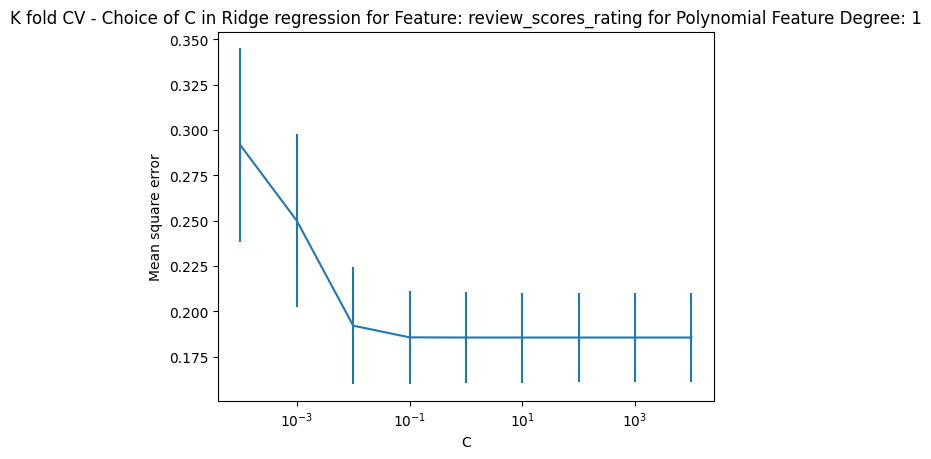

R2 accuracy score: 0.42451352652348195
MAE: 0.2405682682506053
MSE: 0.18151785097250647
RMSE: 0.42604911802808193


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.14489e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16068e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.95636e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.53346e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

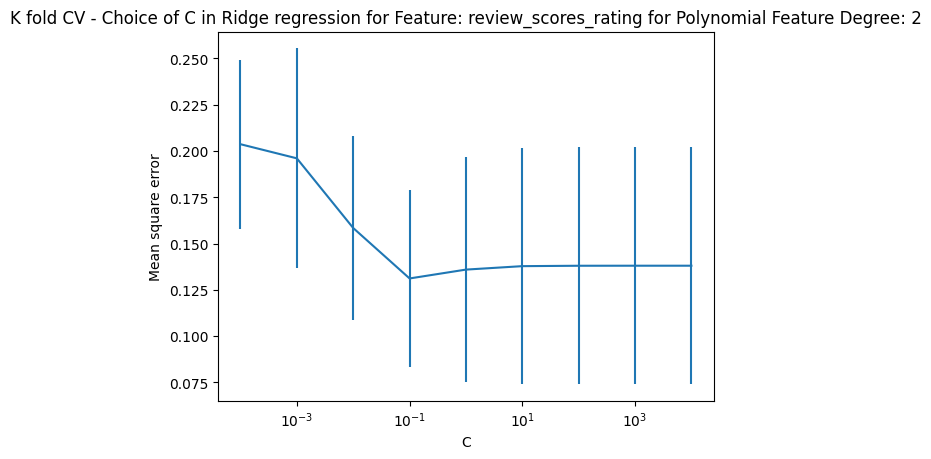

R2 accuracy score: 0.39928027757241047
MAE: 0.2450515317680067
MSE: 0.18947683060756762
RMSE: 0.4352893642251871


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.77706e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25468e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.08561e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.11371e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

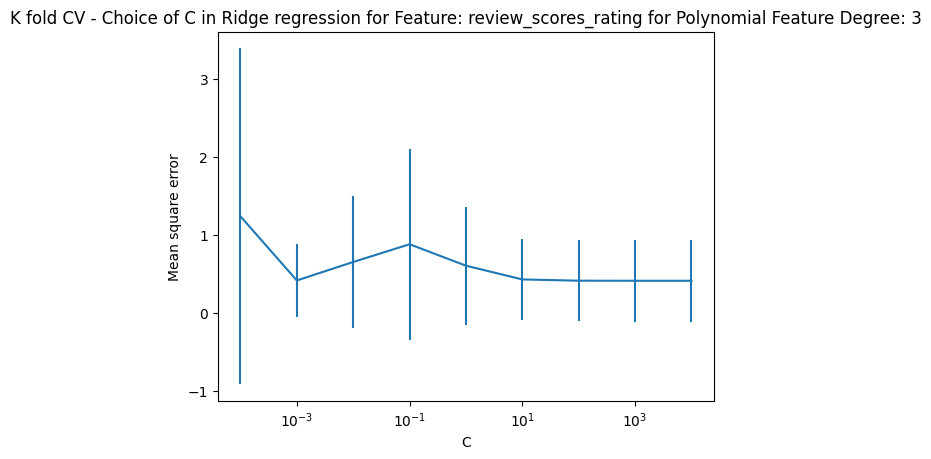

R2 accuracy score: -0.12165468706242177
MAE: 0.2835146220358938
MSE: 0.35378824301266165
RMSE: 0.5948010112740745


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.19985e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.40442e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.83343e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.20559e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

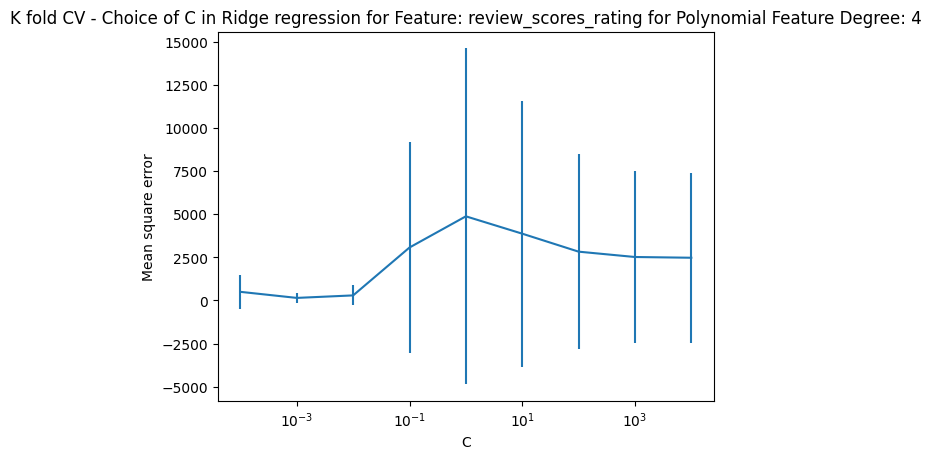

R2 accuracy score: -140.81962941760005
MAE: 0.9601667007382244
MSE: 44.73223184914775
RMSE: 6.6882158943284535


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.97845e-28): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.55526e-27): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.15907e-27): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.85876e-28): result may not be accurate.
  overwrite_a=True).T


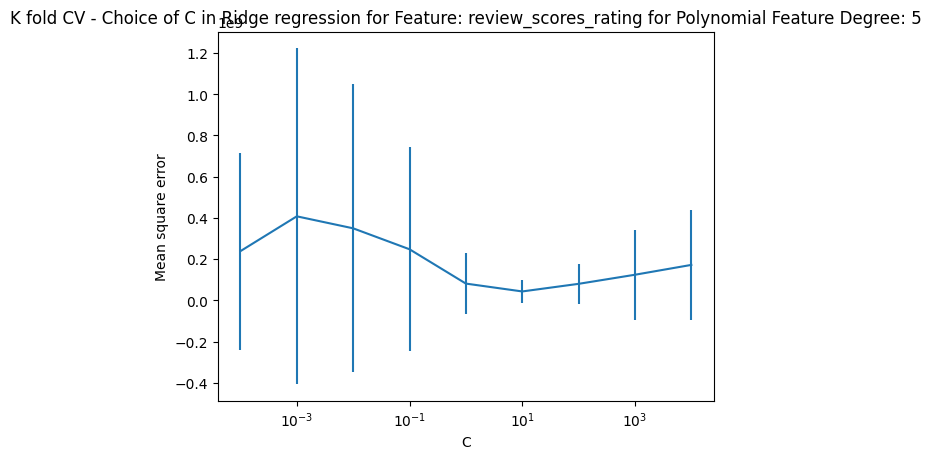

R2 accuracy score: -62960360.036788665
MAE: 315.05291344491366
MSE: 19858728.151874326
RMSE: 4456.313291485948
-------------------------------------
review_scores_accuracy


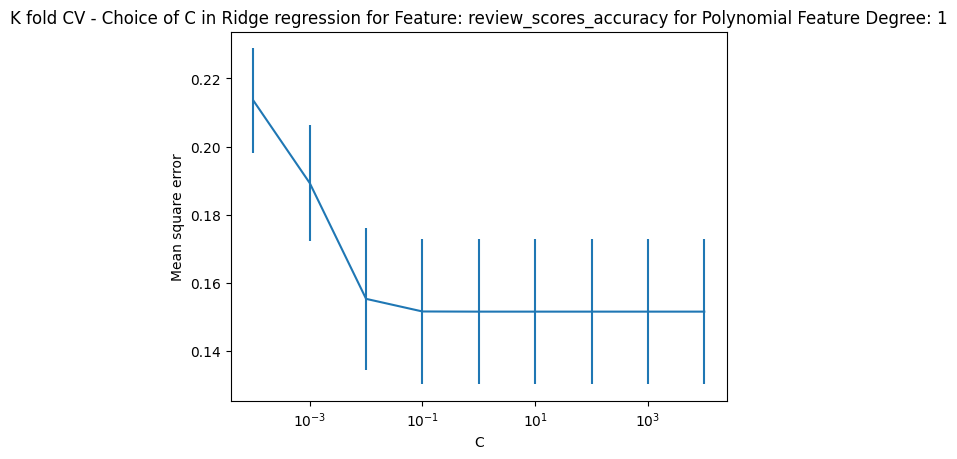

R2 accuracy score: 0.336463303943062
MAE: 0.2043589195937363
MSE: 0.14674305773457624
RMSE: 0.38307056495452146


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.14489e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.16068e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.95636e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.53346e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

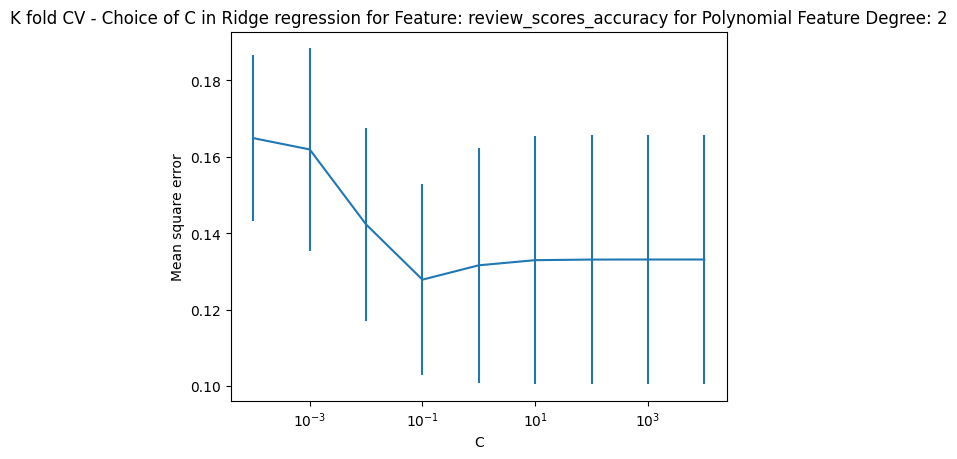

R2 accuracy score: 0.3149307650962665
MAE: 0.22798743198442165
MSE: 0.1515050409224604
RMSE: 0.3892364845726315


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.77706e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.25468e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.08561e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.11371e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

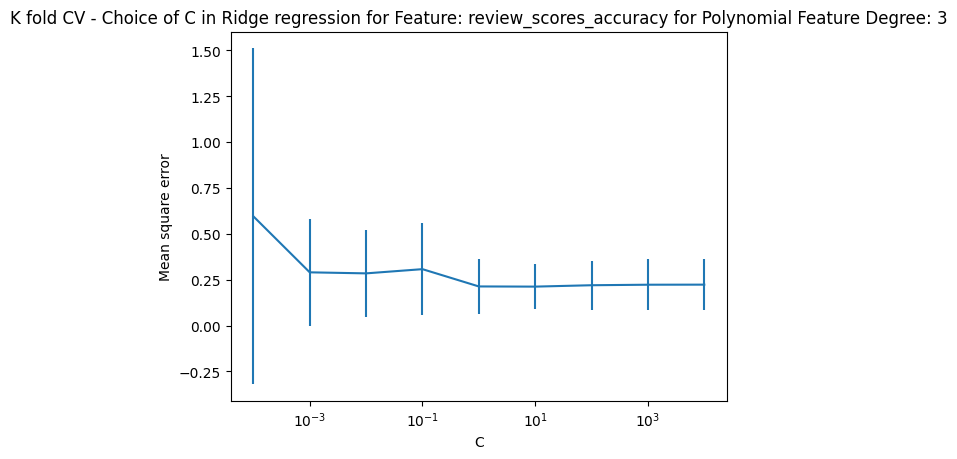

R2 accuracy score: -0.44277054875826005
MAE: 0.2561430615261999
MSE: 0.3190728759875735
RMSE: 0.5648653609379615


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.19985e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.40442e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.83343e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.20559e-21): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

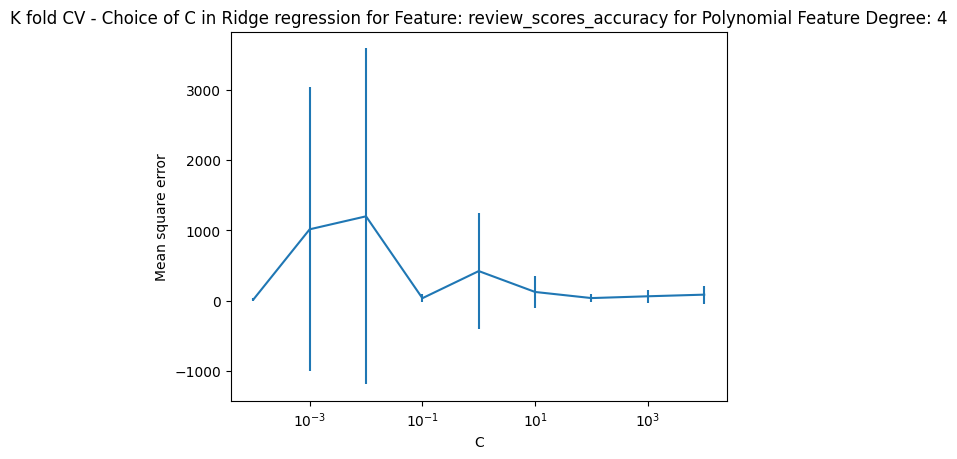

R2 accuracy score: -292.76188258479493
MAE: 1.251686972496341
MSE: 64.96628920830526
RMSE: 8.06016682261014


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.97845e-28): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.55526e-27): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.15907e-27): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.85876e-28): result may not be accurate.
  overwrite_a=True).T


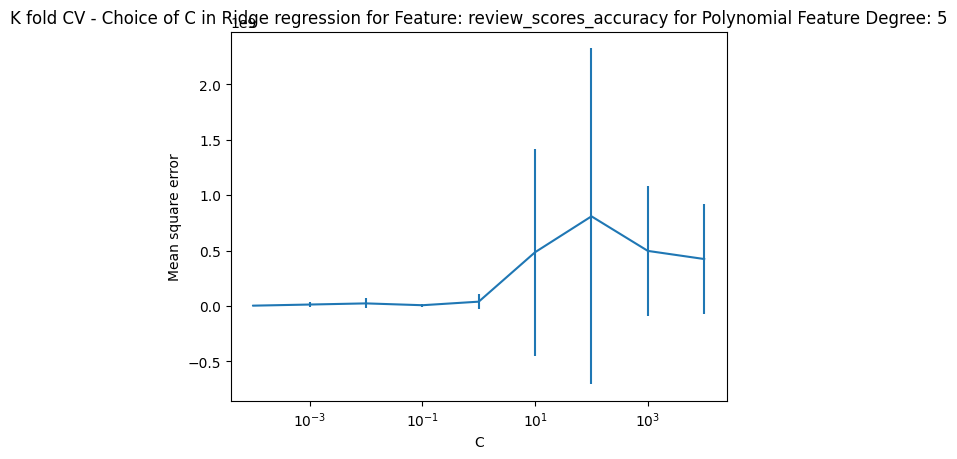

R2 accuracy score: -589229275.455708
MAE: 659.7620332143582
MSE: 130309757.16589907
RMSE: 11415.329919275178
-------------------------------------
review_scores_cleanliness


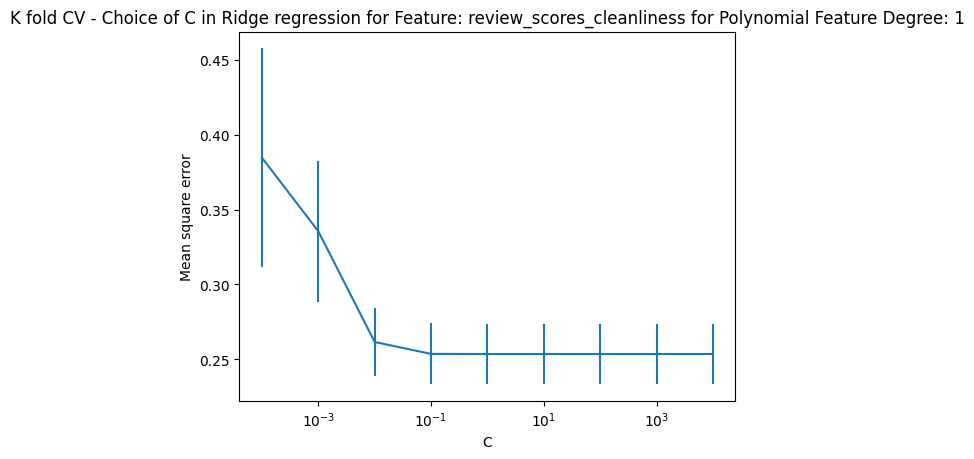

R2 accuracy score: 0.3775667904567559
MAE: 0.26782167623439185
MSE: 0.23094773195470475
RMSE: 0.4805702154261173


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.34938e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.34795e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.34891e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.353e-17): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditi

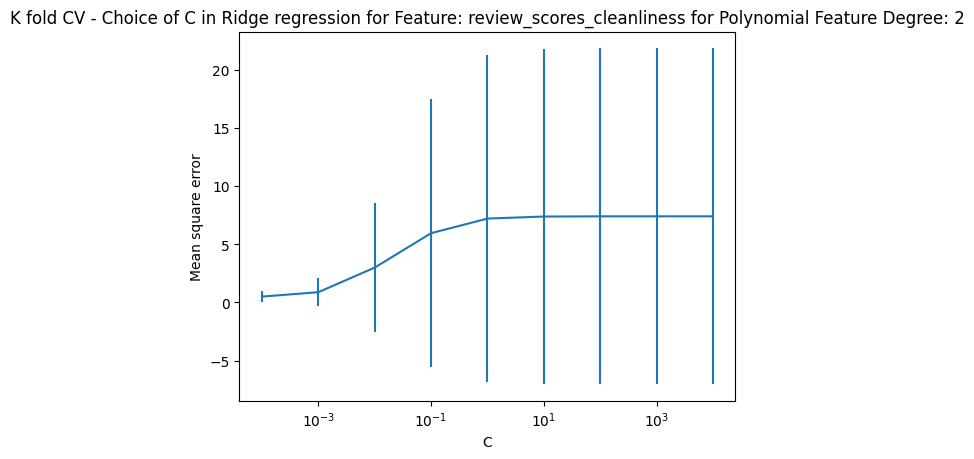

R2 accuracy score: 0.37109828124099487
MAE: 0.2815644682846827
MSE: 0.2333478087976553
RMSE: 0.48306087483634536


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.18946e-19): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.16322e-19): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.10599e-19): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.27122e-19): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

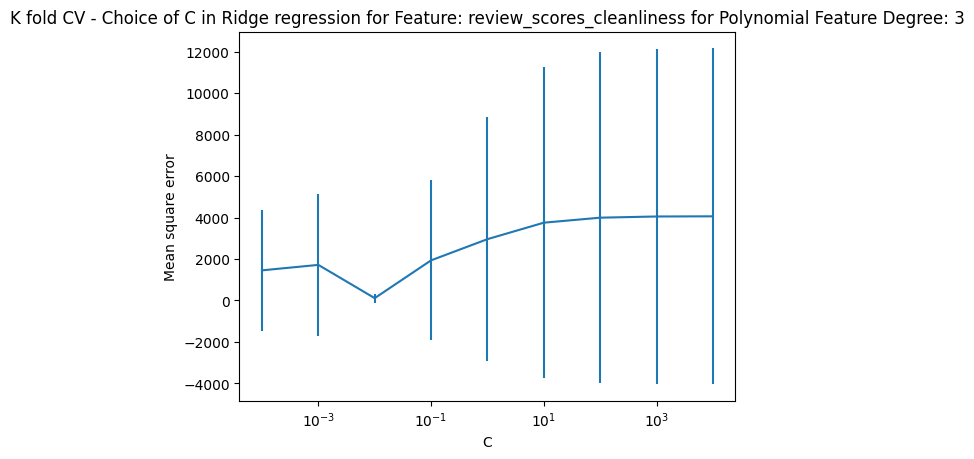

R2 accuracy score: -83.61363682684086
MAE: 0.5294509868753011
MSE: 31.395059289876027
RMSE: 5.603129419340234


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.79448e-26): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.31524e-26): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.23263e-26): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.49213e-22): result may not be accurate.
  overwrite_a=True).T
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

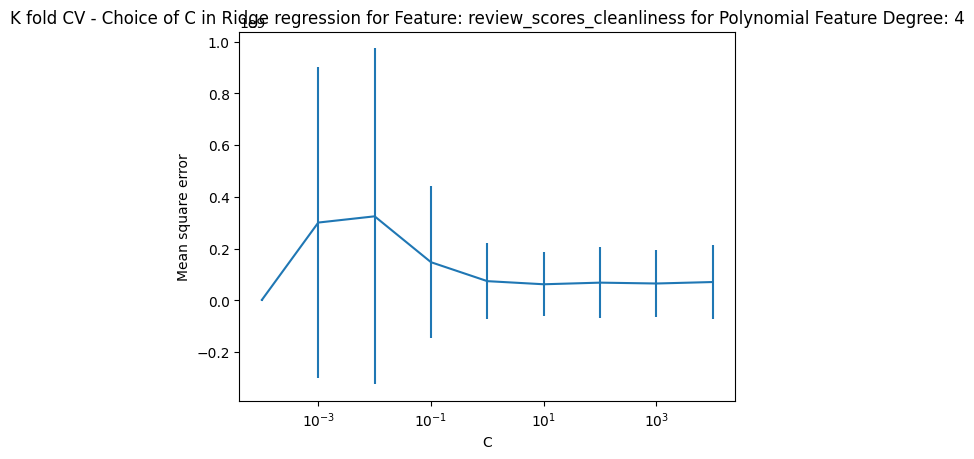

R2 accuracy score: -157772.4864533131
MAE: 9.370536617257864
MSE: 58540.30328124301
RMSE: 241.95103488359584


KeyboardInterrupt: 

In [46]:
c_vals=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
range_of_poly = [1,2,3,4,5] 
model='Ridge'
    
for y in Y:
  features=topFeatures[y.columns[0]]
  fX=X.copy()
  fX=fX[[c for c in X.columns if c in features]]
  print(y.columns[0])
  kfcv(fX,y,c_vals,model,range_of_poly)
  print('-------------------------------------')

#### Random Forest:

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

for y in Y :
    print(y.columns[0])
    feats = topFeatures[y.columns[0]]
    fX = X.copy()
    fX = fX[[c for c in X.columns if c in feats]]

    # Number of trees in random forest
    number_of_trees = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = [1.0, 'sqrt']
    # Maximum number of levels in tree
    max_levels = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_levels.append(None)
    # Minimum number of samples required to split a node
    min_samples_to_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_on_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    method_to_use = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': number_of_trees,
                'max_features': max_features,
                'max_depth': max_features,
                'min_samples_split': min_samples_to_split,
                'min_samples_leaf': min_samples_on_leaf,
                'bootstrap': method_to_use}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest_model = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    random_rf = RandomizedSearchCV(estimator = random_forest_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    random_rf.fit( x_train, y_train.values.ravel() )

    base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
    base_model.fit( x_train, y_train.values.ravel() )

    best_random = random_rf.best_estimator_

    predictions = best_random.predict( x_test )

    print(f'Acc: {accuracy_score(y_test.astype(int),predictions.astype(int))}')
    print(f'RMSE: {mean_squared_error(y_test,predictions)}')
    print(f'R2: {r2_score(y_test,predictions)}')

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.8104359313077939
RMSE: 0.09354111785900247
R2: 0.7470007574081763


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.8110964332892999
RMSE: 0.09318157657971542
R2: 0.7479732032525507


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.808454425363276
RMSE: 0.09444144905147066
R2: 0.74456564528861


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.809775429326288
RMSE: 0.09449490060713105
R2: 0.7444210756767969


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.8104359313077939
RMSE: 0.0949986808351395
R2: 0.7430585089357089


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.8117569352708058
RMSE: 0.0937413223134824
R2: 0.7464592674569521


c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Acc: 0.8104359313077939
RMSE: 0.09457204608388595
R2: 0.7442124214760015


#### Dummy Classifier:

In [35]:
from sklearn.dummy import DummyRegressor

In [45]:
for y in Y:
  features=topFeatures[y.columns[0]]
  fX=X.copy()
  fX=fX[[c for c in X.columns if c in features]]
  print(y.columns[0])
  dummy_classifier = DummyRegressor(strategy="mean")
  dummy_classifier.fit(x_train, y_train)
  ypred=dummy_classifier.predict(x_test)
  print(f'R2 Score: {r2_score(y_test,ypred)}')
  print(f'MSE: {mean_squared_error(y_test,ypred)}')
  print(f'RMSE: {mean_squared_error(y_test,ypred,squared=False)}')
  print(f'Accuracy: {accuracy_score(y_test.astype(int),ypred.astype(int))}')
  print('------------------------------------------')

review_scores_rating
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636
Accuracy: 0.7952443857331571
------------------------------------------
review_scores_accuracy
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636
Accuracy: 0.7952443857331571
------------------------------------------
review_scores_cleanliness
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636
Accuracy: 0.7952443857331571
------------------------------------------
review_scores_checkin
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636
Accuracy: 0.7952443857331571
------------------------------------------
review_scores_communication
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636
Accuracy: 0.7952443857331571
------------------------------------------
review_scores_location
R2 Score: -0.0002461078555304752
MSE: 0.36981983860668854
RMSE: 0.6081281432450636